In [27]:
import pandas as pd
import numpy as np

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
assert sklearn.__version__ >= "0.20"

data=pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/airline_passenger_satisfaction.csv')
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Loyalty
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,1
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,4
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,4
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,4
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,4


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [31]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,3.068278
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,0.993292
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [33]:
data['Class'].value_counts()

Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64

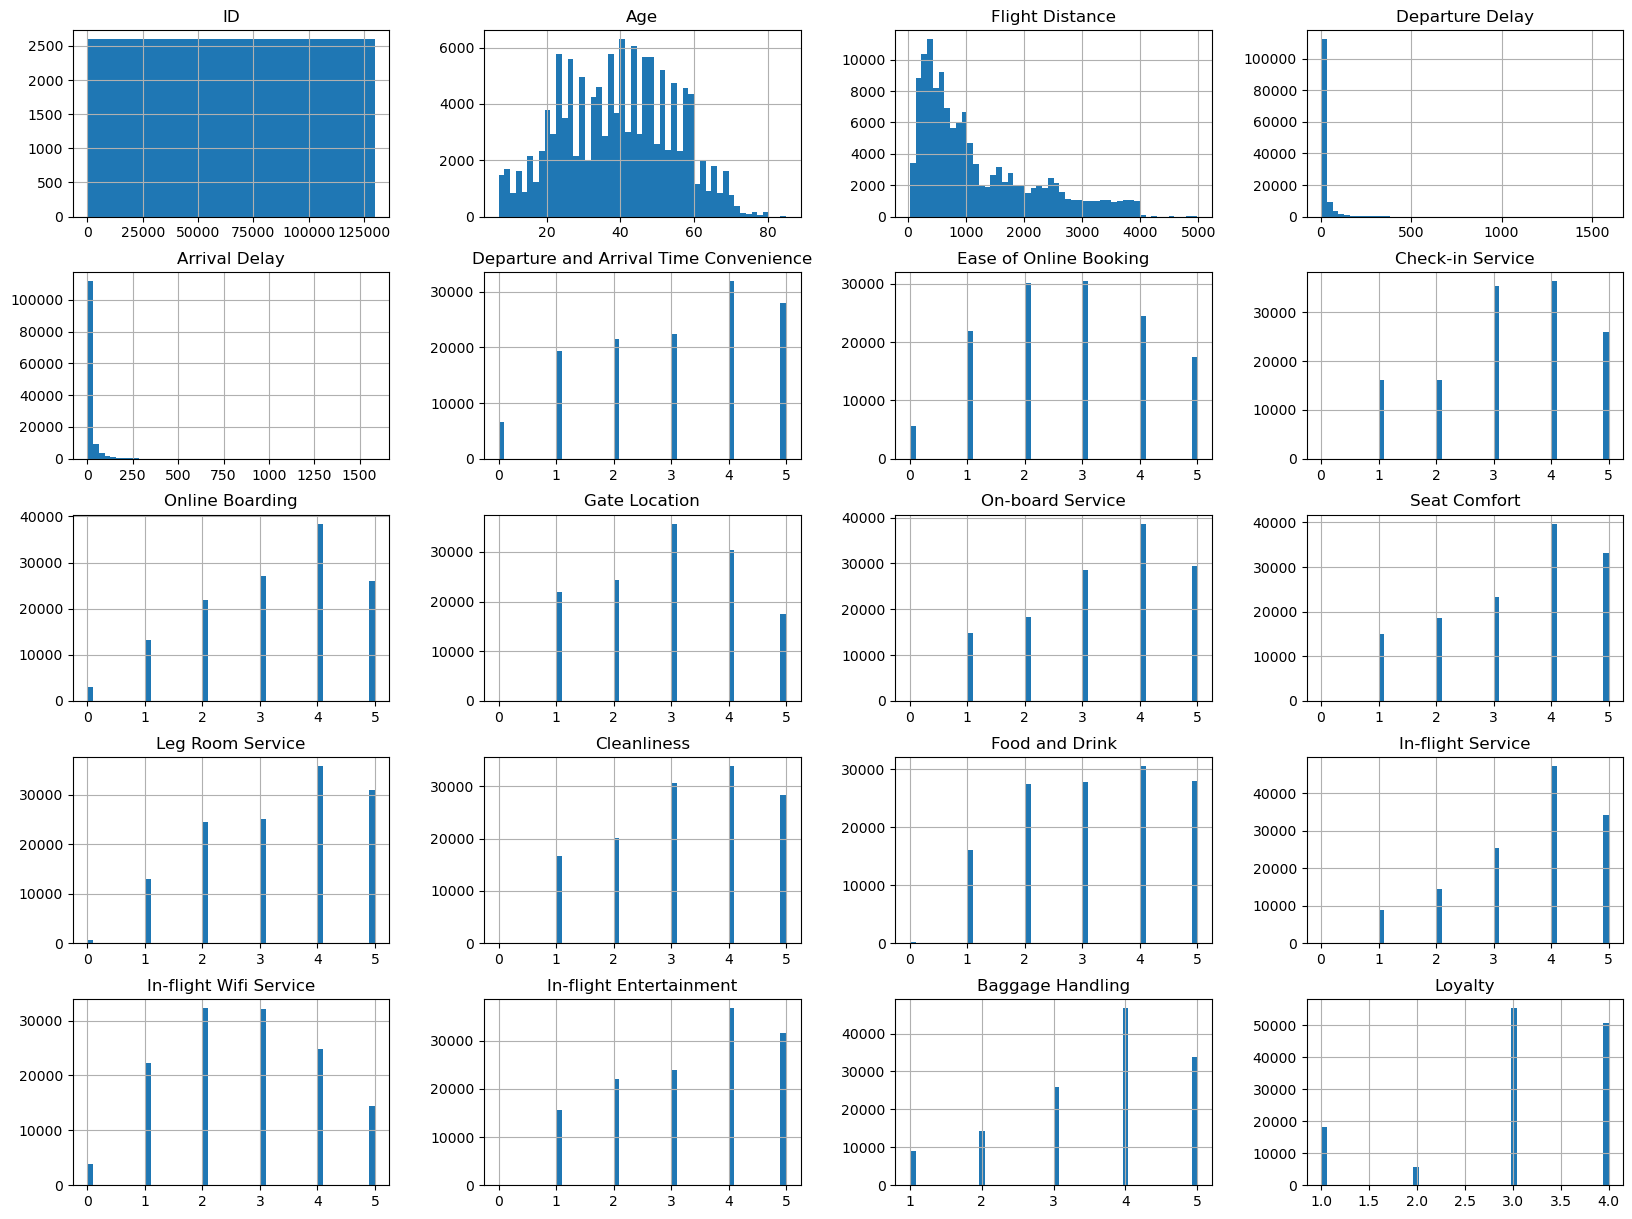

In [35]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [36]:
# Drop the ID column
data = data.drop('ID', axis=1)

# Drop Customer Type and Sataisfaction attributes as Loyalty is derived from these two attributes and Satisfaction is the original attribute
data = data.drop('Customer Type', axis=1)
data = data.drop('Satisfaction', axis=1)
data['Loyalty'].value_counts()

Loyalty
3    55372
4    50728
1    18080
2     5700
Name: count, dtype: int64

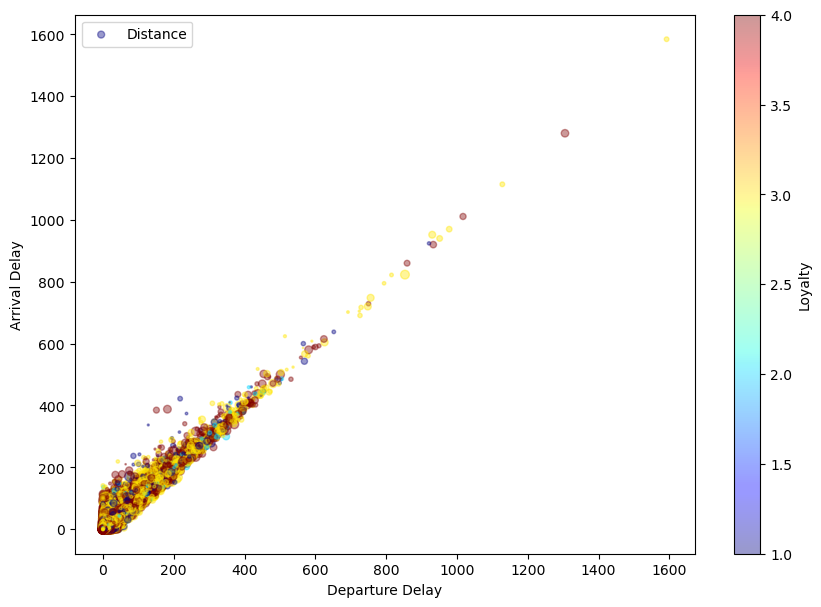

In [39]:
data.plot(kind="scatter", x="Departure Delay", y="Arrival Delay", alpha=0.4,
    s=data["Flight Distance"]/100, label="Distance", figsize=(10,7),
    c="Loyalty", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [41]:
import seaborn as sns

# Check for unique values in categorical columns to understand distributions
categorical_columns = ['Gender',  'Type of Travel', 'Class']
for col in categorical_columns:
    print(f"{col} unique values:\n", data[col].value_counts(), "\n")


Gender unique values:
 Gender
Female    65899
Male      63981
Name: count, dtype: int64 

Type of Travel unique values:
 Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64 

Class unique values:
 Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64 



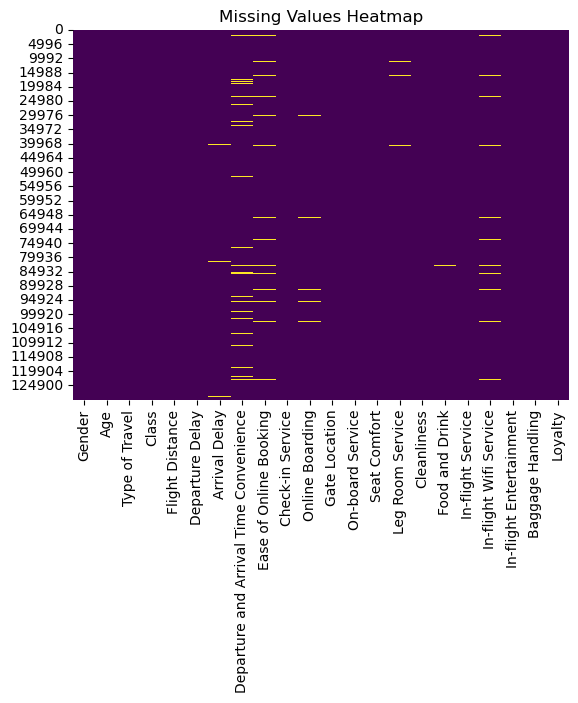

In [43]:
# Replace '0' values with NaN in satisfaction-related columns, as 0 indicates a null/missing survey response.
survey_columns = [
     'Departure and Arrival Time Convenience', 
    'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 
    'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 
    'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 
    'In-flight Entertainment', 'Baggage Handling'
]
data[survey_columns] = data[survey_columns].replace(0, np.nan)

# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [45]:
# Check percentage of missing values
missing_percentage = data.isnull().mean() * 100
print("Percentage of missing values:\n", missing_percentage)

# Impute missing values based on context: 
# - Median for numeric columns
# - Mode for categorical columns
data = data.dropna(subset=survey_columns)

# Impute missing values: Median for numeric columns, mode for categorical columns
for column in ['Departure Delay', 'Arrival Delay']:
    if data[column].isnull().sum() > 0:
        data[column] = data[column].fillna(data[column].median())

print("Null values are corrected \n")

Percentage of missing values:
 Gender                                    0.000000
Age                                       0.000000
Type of Travel                            0.000000
Class                                     0.000000
Flight Distance                           0.000000
Departure Delay                           0.000000
Arrival Delay                             0.302587
Departure and Arrival Time Convenience    5.143979
Ease of Online Booking                    4.374808
Check-in Service                          0.000770
Online Boarding                           2.371420
Gate Location                             0.000770
On-board Service                          0.003850
Seat Comfort                              0.000770
Leg Room Service                          0.460425
Cleanliness                               0.010779
Food and Drink                            0.101632
In-flight Service                         0.003850
In-flight Wifi Service                    3.015091


/var/folders/gx/9cn8k5x52gq_wpn2s2w4j2340000gn/T/ipykernel_36236/883713548.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].fillna(data[column].median())


In [47]:
# Check the percentage of missing values after correction
missing_percentage = data.isnull().mean() * 100
print("Percentage of missing values:\n", missing_percentage)

data['Loyalty'].value_counts()

Percentage of missing values:
 Gender                                    0.0
Age                                       0.0
Type of Travel                            0.0
Class                                     0.0
Flight Distance                           0.0
Departure Delay                           0.0
Arrival Delay                             0.0
Departure and Arrival Time Convenience    0.0
Ease of Online Booking                    0.0
Check-in Service                          0.0
Online Boarding                           0.0
Gate Location                             0.0
On-board Service                          0.0
Seat Comfort                              0.0
Leg Room Service                          0.0
Cleanliness                               0.0
Food and Drink                            0.0
In-flight Service                         0.0
In-flight Wifi Service                    0.0
In-flight Entertainment                   0.0
Baggage Handling                          0.0
Loy

Loyalty
3    52808
4    47525
1    15729
2     3505
Name: count, dtype: int64

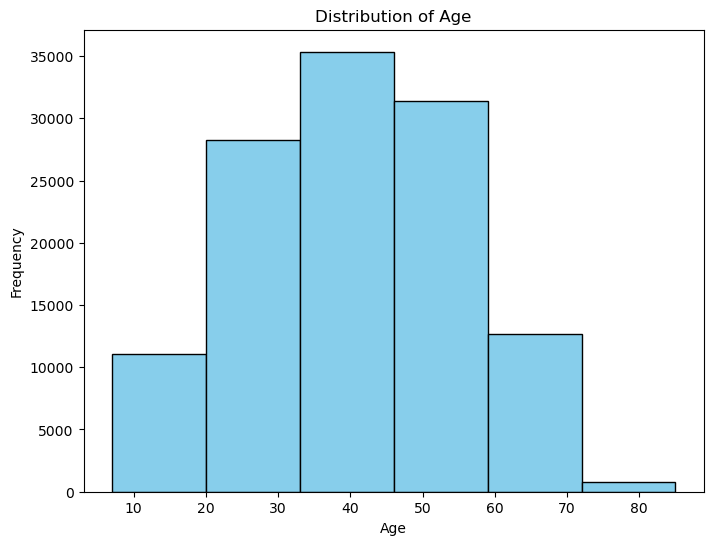

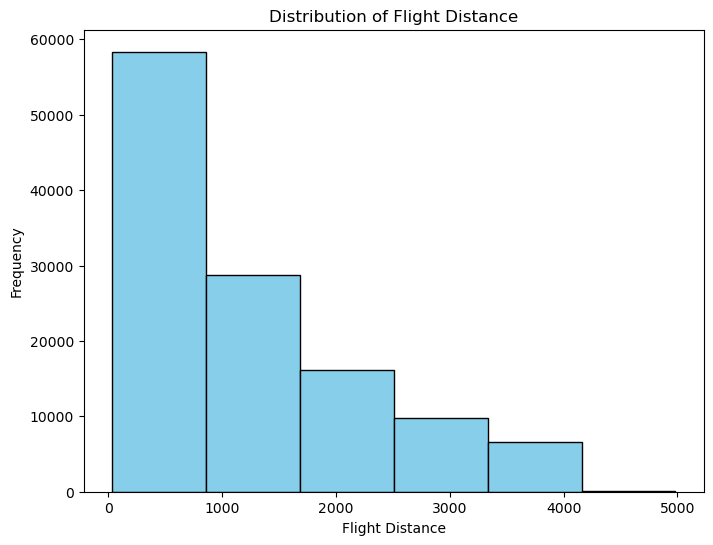

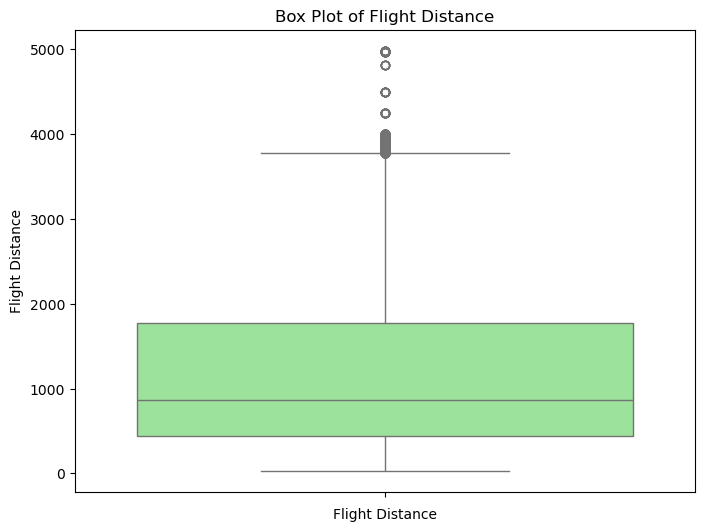

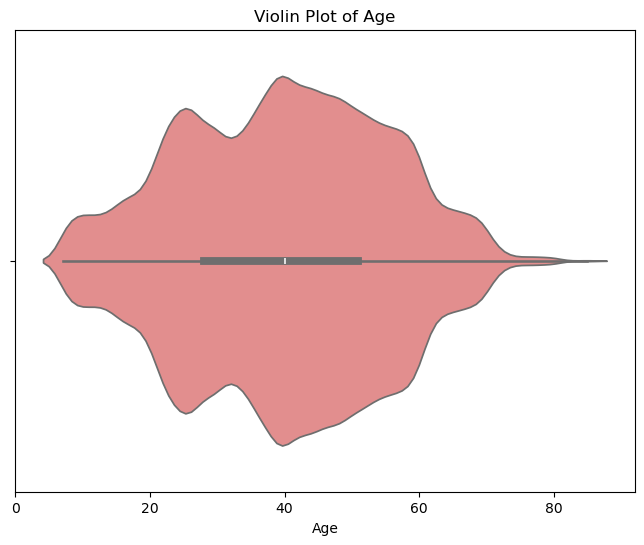

In [49]:

# Visualizing the distribution of a continuous feature, e.g., 'Age'
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=6, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of a continuous feature, e.g., 'Age'
plt.figure(figsize=(8, 6))
plt.hist(data['Flight Distance'], bins=6, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Distance')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()

# Box plot of a feature 'Flight Distance'  Box plots can reveal outliers and distribution spread. They are helpful for understanding how data values are dispersed across quartiles.
plt.figure(figsize=(8, 6))
sns.boxplot(data['Flight Distance'], color='lightgreen')
plt.title('Box Plot of Flight Distance')
plt.xlabel('Flight Distance')
plt.show()


# Violin plot for Age Violin plots combine a box plot with a kernel density plot, which is helpful for observing the distribution, especially if it’s multimodal (has multiple peaks).
plt.figure(figsize=(8, 6))
sns.violinplot(x=data['Age'], color='lightcoral')
plt.title('Violin Plot of Age')
plt.xlabel('Age')
plt.show()





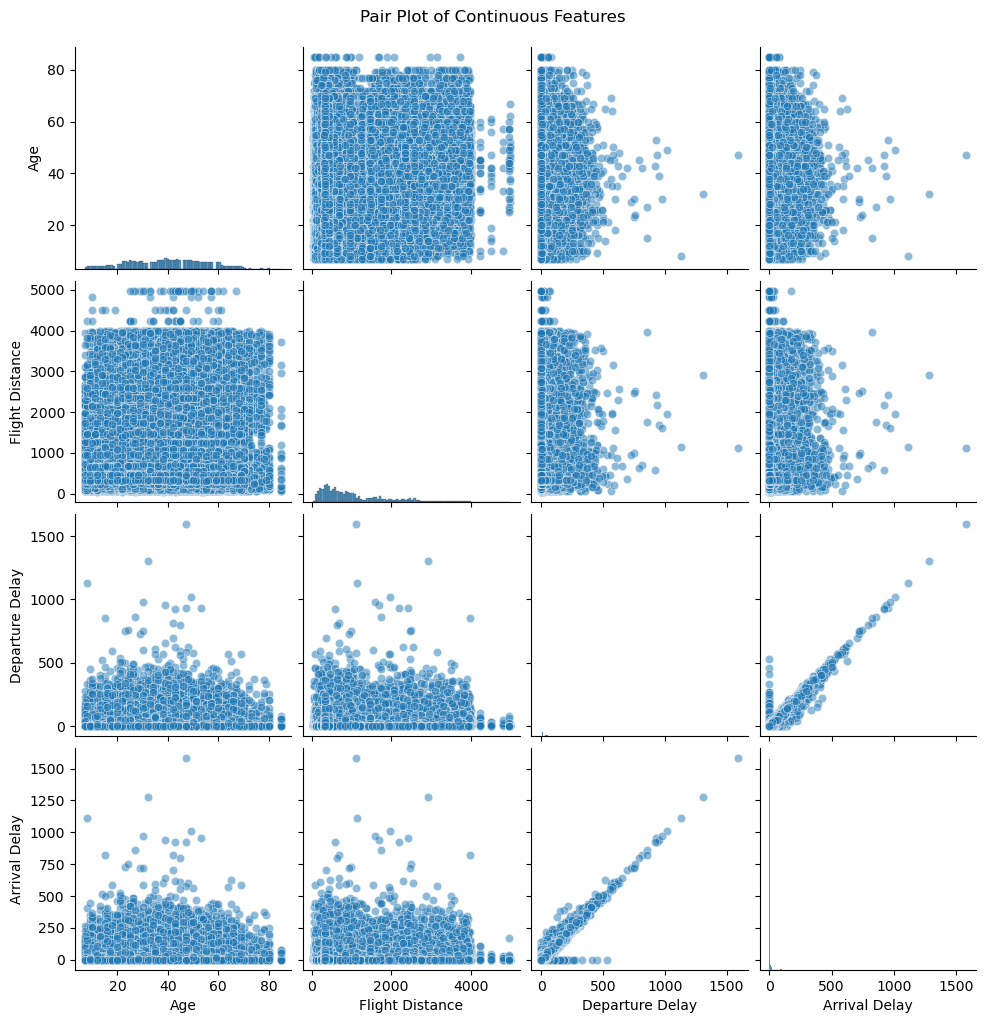

In [67]:
# Pair Plot  If you want to examine multiple features before splitting, a pair plot is a good choice as it shows pairwise relationships and distribution for each feature.


# Subset of continuous variables for pair plot
continuous_features = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

sns.pairplot(data[continuous_features], diag_kind='hist', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Continuous Features', y=1.02)
plt.show()

In [69]:
#Encoding data 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


# One-hot encoding - Not going with this as its not helping in correlation and ANN
#data_encoded_1 = pd.get_dummies(data, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'])
# Encoding for all the category columns to ensure that all numbers taken up for maching learning

data.loc[:, categorical_columns] = data[categorical_columns].apply(le.fit_transform)
#categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']


data.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
0,1,48,0,0,821,2,5.0,3.0,3.0,4.0,...,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,1
1,0,35,0,0,821,26,39.0,2.0,2.0,3.0,...,5.0,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,4
2,1,41,0,0,853,0,0.0,4.0,4.0,4.0,...,3.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,3,4
3,1,50,0,0,1905,0,0.0,2.0,2.0,3.0,...,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,5,4
4,0,49,0,0,3470,0,1.0,3.0,3.0,3.0,...,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3,4


In [71]:
output_file_path = "../../data/encoded_data.csv"

data.to_csv(output_file_path, index=False)

print(f"Encoded data has been successfully saved to {output_file_path}")

Encoded data has been successfully saved to ../../data/encoded_data.csv


Data types of each column:
 Gender                                     object
Age                                         int64
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience    float64
Ease of Online Booking                    float64
Check-in Service                          float64
Online Boarding                           float64
Gate Location                             float64
On-board Service                          float64
Seat Comfort                              float64
Leg Room Service                          float64
Cleanliness                               float64
Food and Drink                            float64
In-flight Service                         float64
In-flight Wifi Service                    float64
In-flight Entertainmen

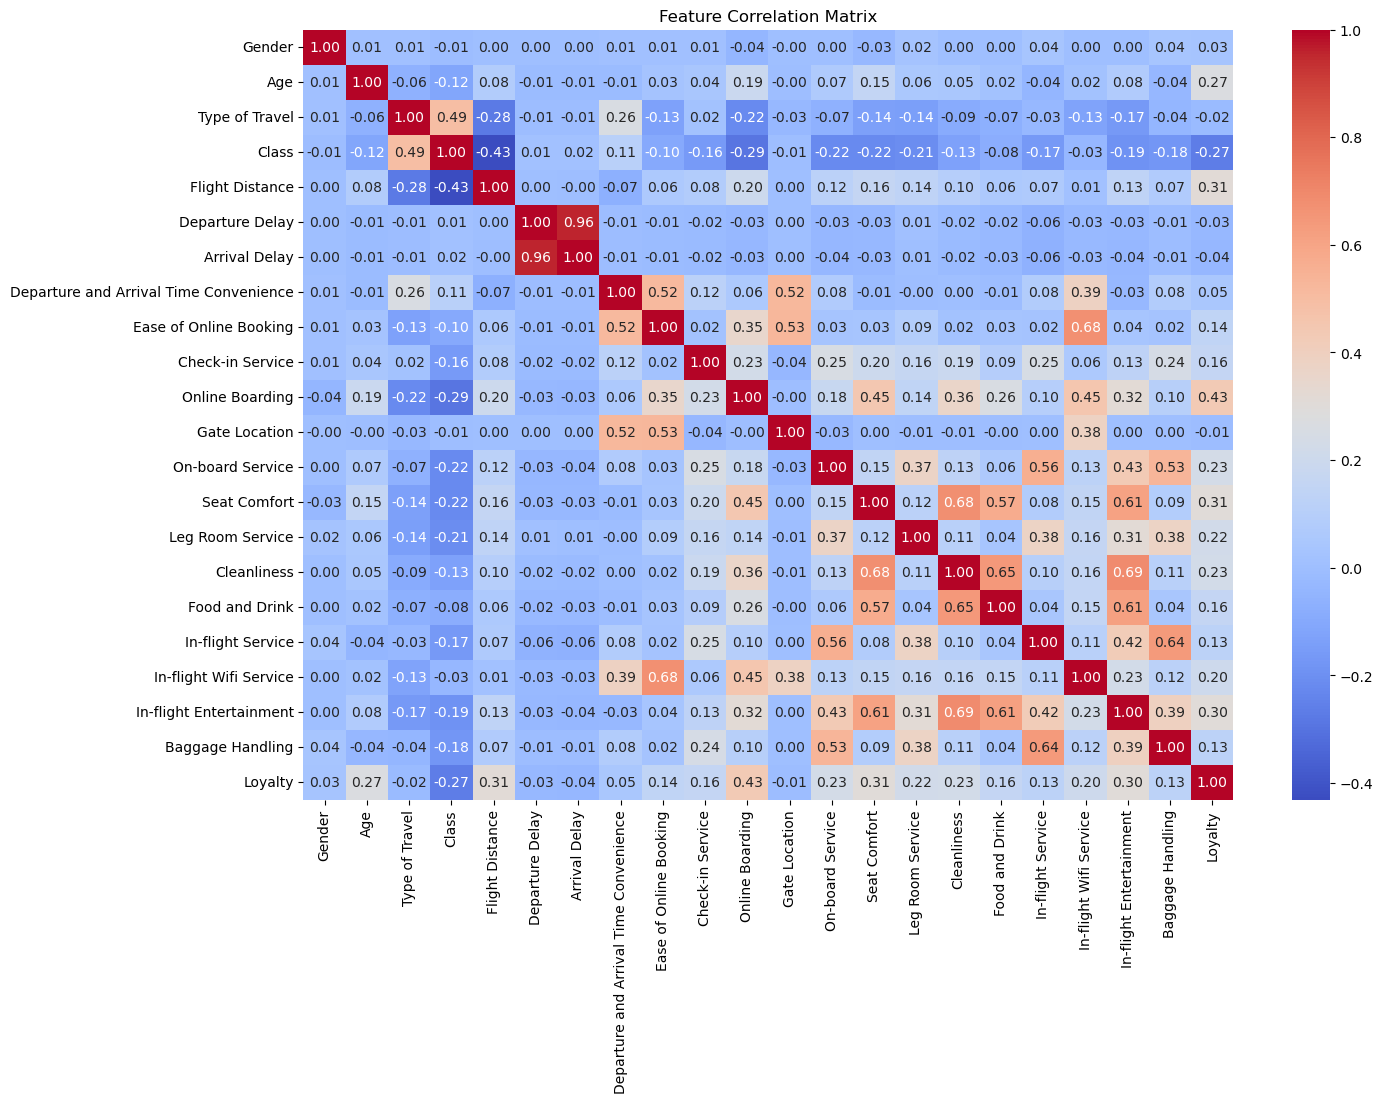

In [55]:
print("Data types of each column:\n", data.dtypes)

# 2. Select only numeric columns
numeric_data = data

# 3. Calculate and plot the correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [57]:
data.head()


# Recalculate the correlation matrix
corr_matrix = data.corr()

# Get the correlation of all features with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"]

# Convert all correlations to absolute values (making negative correlations positive)
loyalty_correlations = loyalty_correlations.abs()

# Sort the correlations in descending order
sorted_loyalty_correlations = loyalty_correlations.sort_values(ascending=False)

# Print the sorted positive correlations
print(sorted_loyalty_correlations)


Loyalty                                   1.000000
Online Boarding                           0.433505
Flight Distance                           0.311779
Seat Comfort                              0.305828
In-flight Entertainment                   0.304616
Age                                       0.269590
Class                                     0.266307
On-board Service                          0.229805
Cleanliness                               0.227971
Leg Room Service                          0.218429
In-flight Wifi Service                    0.203990
Food and Drink                            0.158994
Check-in Service                          0.157433
Ease of Online Booking                    0.143225
Baggage Handling                          0.127392
In-flight Service                         0.126431
Departure and Arrival Time Convenience    0.048320
Arrival Delay                             0.038125
Departure Delay                           0.033670
Gender                         

In [59]:
from sklearn.feature_selection import SelectKBest, f_classif  # f_classif for classification problems
import pandas as pd

X = data.drop(columns=['Loyalty'])
y = data['Loyalty']

# Apply SelectKBest to select the top 10 features
k = 10  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)  # f_classif is used for classification problems
X_selected = selector.fit_transform(X, y)

# Get the scores and feature names
scores = selector.scores_
features = X.columns

# Create a DataFrame for feature scores
feature_scores = pd.DataFrame({'Feature': features, 'Importance': scores})
feature_scores = feature_scores.sort_values(by='Importance', ascending=False)

# Display the top 10 features
top_features = feature_scores.head(k)
print(top_features)

# Optionally, filter the dataset to include only the top 10 features
X_top10 = X[top_features['Feature'].values]


                    Feature    Importance
2            Type of Travel  26790.577679
10          Online Boarding  19783.833429
3                     Class  10699.116102
19  In-flight Entertainment  10586.892955
18   In-flight Wifi Service   7575.768004
13             Seat Comfort   7538.743633
14         Leg Room Service   5743.901157
12         On-board Service   5565.886301
4           Flight Distance   5539.139797
15              Cleanliness   5424.034253


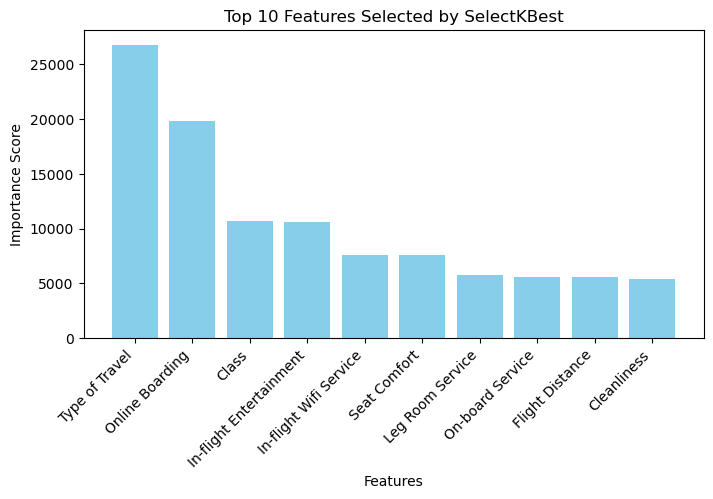

In [61]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(8, 4))
plt.bar(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top 10 Features Selected by SelectKBest')
plt.show()

In [63]:
data.groupby('Type of Travel')['Loyalty'].mean()

Type of Travel
0    3.118922
1    3.074002
Name: Loyalty, dtype: float64

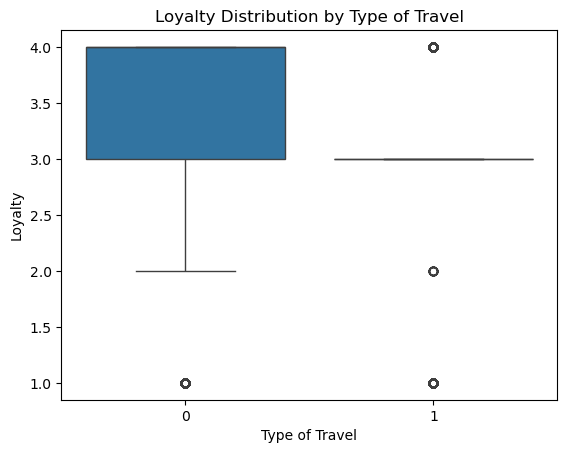

In [65]:
import seaborn as sns
sns.boxplot(x='Type of Travel', y='Loyalty', data=data)
plt.title('Loyalty Distribution by Type of Travel')
plt.show()